<a href="https://colab.research.google.com/github/indriyatirs/BikeSharing/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Indriyati Rahmi Setyani
- Email: indriyatirs@gmail.com
- Id Dicoding: indriyatirs

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa pertumbuhan pengguna sistem bike-sharing?
2. Kapan hari yang memiliki tingkat pengguna/user paling tinggi? Apakah ada hubungannya dengan hari libur?
3. Kapan musim dengan persentase user tertinggi?
4. Kapan waktu/jam peminjaman sepeda mencapai angka tertinggi?

## Metadata Dataset

| Column                                             | Description                                                                                                                                                                                                                                             |
|----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| instant                                               | record index                                                                                                                                                                                                                                                    |
| dteday                                            | date                                                                                                                                                                                                                                           |
| season                                              | season (1: springer, 2: summer, 3: fall, 4: winter)                                                                                                                                                                                                                                                   |
| yr                                         | year (0: 2011, 1: 2012)                                                                                                                                                                                                                                            |
| mnth                                       | month (1 to 12)                                                                                                                                                                                                                                |
| hr                                           | hour (0 to 23)                                                                                                                                                                                                                      |
| holiday                                      | weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)                                                                                                                                                                                                                              |
| weekday                                  | day of the week                                                                                                                                                                                                                          |
| workingday                                       | if day is neither weekend nor holiday is 1, otherwise is 0                                                                                                                                                                                                             |
| weathersit                                      | - 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                                                                                                                                         |
|                                  | - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                                                                                                                                                                                     |
|                                         | - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                                                                                                                                                                                                                                   |
|                                       | - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                                                                                                                                                             |
| temp                                   | Normalized temperature in Celsius. The values are divided to 41 (max)                                                                                                                                                      |
| atemp                                       | Normalized feeling temperature in Celsius. The values are divided to 50 (max)                                                                                                                                                                                             |
| hum                                     | Normalized humidity. The values are divided to 100 (max)                                                                                                                                                                                              |
| windspeed                                   | Normalized wind speed. The values are divided to 67 (max)                                                                                                                                                                                            |
| casual                                   | count of casual users                                                                                                                                                                                            |
| registered                                      | count of registered users                                                                                                                                                                                            |
| cnt                                        | count of total rental bikes including both casual and registered                                                                                                                                                                                                         |


## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#download dataset day.csv dari gdrive
! gdown --id 1EPd5mI9DRB4hHQ1kzPWg4ze7vkO8P5YH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EPd5mI9DRB4hHQ1kzPWg4ze7vkO8P5YH
To: /content/day.csv
100% 57.6k/57.6k [00:00<00:00, 93.4MB/s]


In [ ]:
#download dataset hour.csv dari gdrive
! gdown --id 1Az-e9iZX1pXSzK-cGW1HEOO7dPuO0SBf

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Az-e9iZX1pXSzK-cGW1HEOO7dPuO0SBf
To: /content/hour.csv
100% 1.16M/1.16M [00:00<00:00, 108MB/s]


## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data kosong pada data day_df. Akan tetapi, datatype pada kolom dteday berupa object dimana seharusnya tanggal memiliki datatype datetime.

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada data describe yang ditampilkan.

#### Menilai Data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data kosong pada data day_df. Akan tetapi, datatype pada kolom dteday berupa object dimana seharusnya tanggal memiliki datatype datetime.

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Data day_df

##### Mengubah data type pada kolom dteday

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

##### Mengubah nama kolom data day_df

Dikarenakan nama kolom/atribut yang digunakan pada dataset bersifat ambigu pengetikkannya maka nama kolom-kolom tertentu akan diganti sehingga dapat teridentifikasi dengan jelas.

In [ ]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "cnt": "total_count"
}, inplace=True)

#### Membersihkan Data hour_df

##### Mengubah data type pada kolom dteday

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

##### Mengubah nama kolom data hour_df

Sama halnya dengan data day_df, penamaan kolom masih belum menimbulkan kebingungan sehingga akan diganti dengan penamaan yang lebih jelas.

In [ ]:
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "total_count"
}, inplace=True)

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [ ]:
day_df.describe(include="all")

<ipython-input-16-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000



Berdasarkan informasi dari tabel di atas diketahui bahwa **jumlah rata-rata total user** per harinya selama 2 tahun dari tahun 2011 - 2012 berada dikisaran **4504 user** dengan pengguna **paling sedikit adalah 22 pengguna** dan **paling besar berjumlah 8714 user**.

In [ ]:
day_df.groupby(by='year').total_count.sum()

year
0    1243103
1    2049576
Name: total_count, dtype: int64

Data di atas menunjukkan bahwa pengguna sepeda meningkat pesat di tahun 2012 dibandingkan dengan tahun sebelumnya, menunjukkan bahwa peminat terhadap penggunaan sepeda semakin tinggi dari tahun ke tahun.

Kemudian melihat jumlah jenis user yaitu casual dan registered yang menggunakan layanan setiap harinya.

In [ ]:
day_df.groupby(by='weekday').agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"]
})

casual                          registered                           
           max min         mean     sum        max   min         mean     sum
weekday                                                                      
0         3283  54  1338.295238  140521       5657   451  2890.533333  303506
1         3065   2   674.133333   70784       6435    20  3663.990476  384719
2         1348   9   556.182692   57843       6697   573  3954.480769  411266
3         2562   9   551.144231   57319       6946   432  3997.394231  415729
4         1405  15   590.961538   61460       6781   416  4076.298077  423935
5         2469  38   752.288462   78238       6917  1129  3938.000000  409552
6         3410  57  1465.257143  153852       5966   570  3085.285714  323955

Terlihat bahwa **registered** user memiliki jumlah pengguna yang relatif **lebih konstan** setiap harinya dibandingkan dengan user yang bersifat casual. Diketahui juga bahwa **casual** user mengalami **peningkatan jumlah** pengguna dimulai dari hari **Sabtu hingga Senin**.

### Eksplorasi Data hour_df

In [ ]:
hour_df.describe(include="all")

<ipython-input-19-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan tabel di atas dapat diketahui bahwa banyak **rata-rata user per harinya sebesar 189 user** sedangkan **total user yang paling besar** per jamnya berada diangka **977 user**.

In [ ]:
hour_df.groupby(by='hour').total_count.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: total_count, dtype: int64

Berdasarkan informasi di atas diketahui bahwa pengguna sepeda paling banyak pada pukul 17 atau pukul 5 sore hari.

## Visualization & Explanatory Analysis

### Bagaimana performa pertumbuhan pengguna sistem bike-sharing?

In [ ]:
hour_df['bln'] = hour_df['date'].dt.strftime('%b')
hour_df['bln'] = pd.Categorical(hour_df['bln'],
                               ordered=True,
                               categories=['Jan',
                                           'Feb',
                                           'Mar',
                                           'Apr',
                                           'May',
                                           'Jun',
                                           'Jul',
                                           'Aug',
                                           'Sep',
                                           'Oct',
                                           'Nov',
                                           'Dec'])

In [ ]:
bike = hour_df[['year', 'total_count', 'bln']]
bike2011 = bike.loc[bike['year'] == 0]
bike2011 = bike2011[['bln', 'total_count']].groupby('bln').sum().reset_index()

bike2012 = bike.loc[bike['year'] == 1]
bike2012 = bike2012[['bln', 'total_count']].groupby('bln').sum().reset_index()

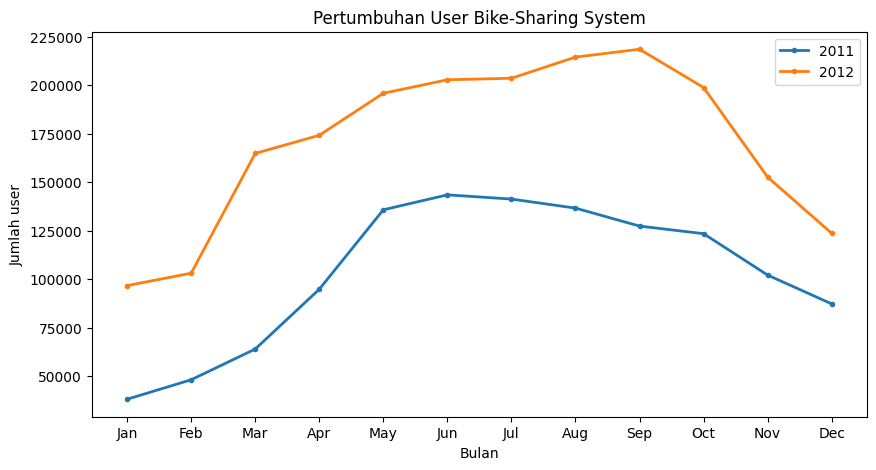

In [ ]:
plt.figure(figsize = (10,5))

plt.plot(
    bike2011['bln'],
    bike2011['total_count'],
    label='2011',
    marker=".",
    linewidth=2,
)

plt.plot(
    bike2012['bln'],
    bike2012['total_count'],
    label='2012',
    marker=".",
    linewidth=2,
)

plt.xlabel('Bulan')
plt.ylabel('Jumlah user')
plt.title('Pertumbuhan User Bike-Sharing System')
plt.legend()
plt.show()

In [ ]:
casual_regis_growth = hour_df[['year', 'casual', 'registered', 'bln']]
casual_regis_growth = casual_regis_growth[['bln', 'casual', 'registered', 'year']].groupby('bln').sum().reset_index()

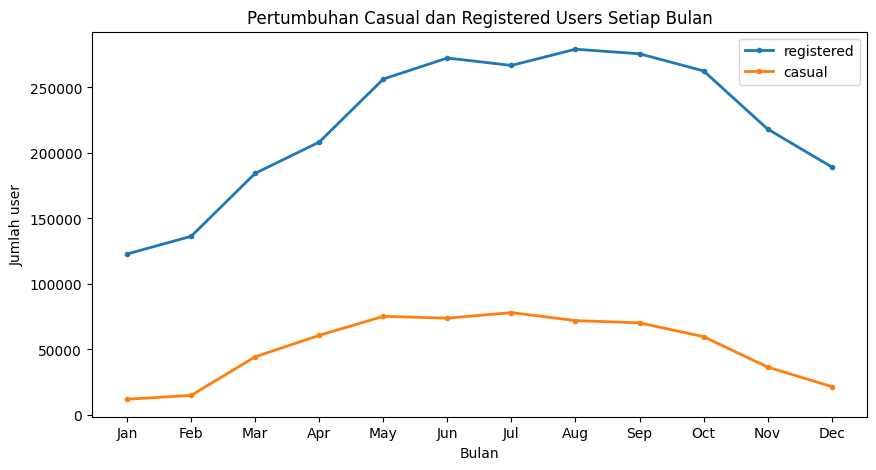

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.plot(
    casual_regis_growth['bln'],
    casual_regis_growth['registered'],
    label='registered',
    marker=".",
    linewidth=2,
)

plt.plot(
    casual_regis_growth['bln'],
    casual_regis_growth['casual'],
    label='casual',
    marker=".",
    linewidth=2,
)

plt.xlabel('Bulan')
plt.ylabel('Jumlah user')
plt.title('Pertumbuhan Casual dan Registered Users Setiap Bulan')
plt.legend()

plt.show()

- Penggunaan sistem bike-sharing semakin tinggi dari tahun ke tahun hal ini menunjukkan bahwa masyarakat memiliki minat yang tinggi terhadap penggunaan sepeda.
- Peminat terhadap adanya sistem bike-sharing terlihat mulai meningkat pesat pada bulan Maret-April 2011 hal ini salah satunya dapat disebabkan karena pada rentang bulan tersebut terdapat Festival Cherry Blossom Nasional yang rutin dilaksanakan setiap tahunnya di Washington, D.C.
- Sedangkan pada tahun 2012 peminat terhadap bike-sharing ini mulai meningkat tajam pada bulan Februari.

### Kapan hari yang memiliki tingkat pengguna/user paling tinggi? Apakah ada hubungannya dengan hari libur?

In [ ]:
hour_df['day'] = hour_df['date'].dt.strftime('%a')
hour_df['day'] = pd.Categorical(hour_df['day'],
                               ordered=True,
                               categories=['Mon',
                                           'Tue',
                                           'Wed',
                                           'Thu',
                                           'Fri',
                                           'Sat',
                                           'Sun'])

In [ ]:
days = hour_df[['day', 'total_count']].groupby('day').sum().sort_values(by='day', ascending=False).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

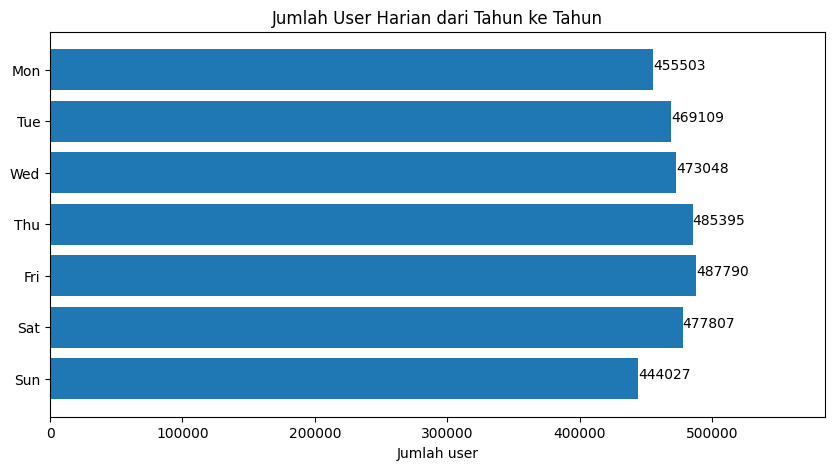

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,1,1)
ax1.barh(days.day, days.total_count)

for Y, X in enumerate(days.total_count):
  ax1.annotate(X, xy=(X,Y))

ax1.set_xlim(0, days.total_count.max() * 1.2)

plt.xlabel('Jumlah user')
plt.title('Jumlah User Harian dari Tahun ke Tahun')

plt.show

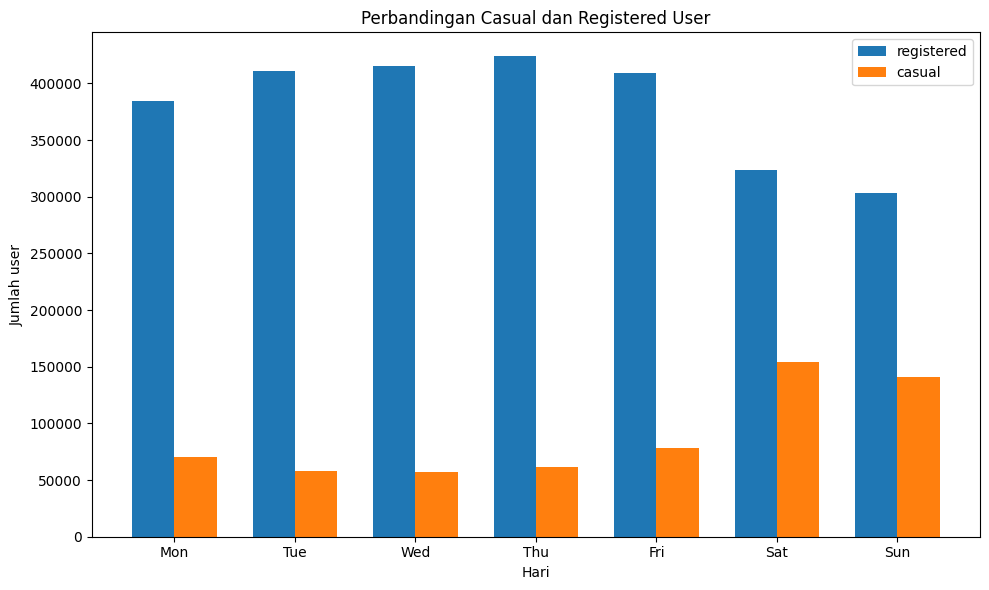

In [ ]:
data_days = hour_df[['day','casual', 'registered']].groupby('day').sum().reset_index()

# create plot
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(7)
bar_width = 0.35

rects1 = ax.bar(index, data_days['registered'], bar_width, label='registered')

rects2 = ax.bar(index + bar_width, data_days['casual'], bar_width, label='casual')

ax.set_xlabel('Hari')
ax.set_ylabel('Jumlah user')
ax.set_title('Perbandingan Casual dan Registered User')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
casual_regis_day_growth = hour_df[['year', 'casual', 'registered', 'day']]
casual_regis_day_growth = casual_regis_day_growth[['day', 'casual', 'registered']].groupby('day').sum().reset_index()

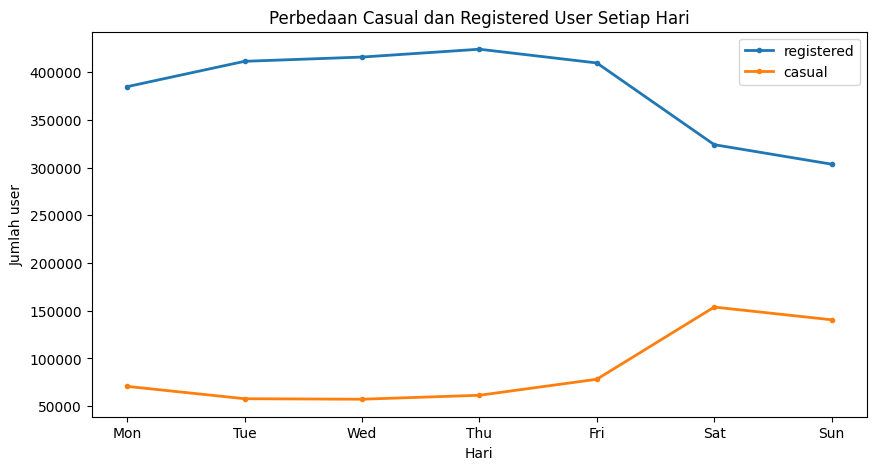

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.plot(
    casual_regis_day_growth['day'],
    casual_regis_day_growth['registered'],
    label='registered',
    marker=".",
    linewidth=2,
)

plt.plot(
    casual_regis_day_growth['day'],
    casual_regis_day_growth['casual'],
    label='casual',
    marker=".",
    linewidth=2,
)

plt.ylabel('Jumlah user')
plt.xlabel('Hari')
plt.title('Perbedaan Casual dan Registered User Setiap Hari')
plt.legend()

plt.show()

- Total penggunaan bike-sharing setiap harinya memiliki jumlah yang tinggi dan cenderung konstan, hal ini menunjukkan bahwa penggunaan sepeda sudah menjadi kebutuhan di masyarakat.
- Terdapat perbedaan jumlah casual user dan registered user yang menggunakan sistem bike-sharing. Jumlah casual user mulai terjadi peningkatan sejak hari Jum'at hingga Minggu, hal ini menunjukkan bahwa sebagian besar casual user berasal dari turis atau yang sedang melakukan liburan di akhir pekan.
- Sebaliknya, registered user mengalami menurunan di akhir pekan dan penggunaan tertinggi terjadi di hari kerja, menunjukkan bahwa registered user merupakan user yang menggunakan sistem bike-sharing ini untuk keperluan seperti berangkat kerja, sekolah dan lainnya.

### Kapan musim dengan persentase user tertinggi?

In [ ]:
def musim(x):
  if x == 1:
    return 'Spring'
  elif x == 2:
    return 'Summer'
  elif x == 3:
    return 'Fall'
  else:
    return 'Winter'

hour_df['musim'] = hour_df['season'].apply(musim)

In [ ]:
season = hour_df[['musim', 'total_count']].groupby('musim').sum().sort_values(by='total_count', ascending=False).reset_index()

In [ ]:
season.head()

,musim,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


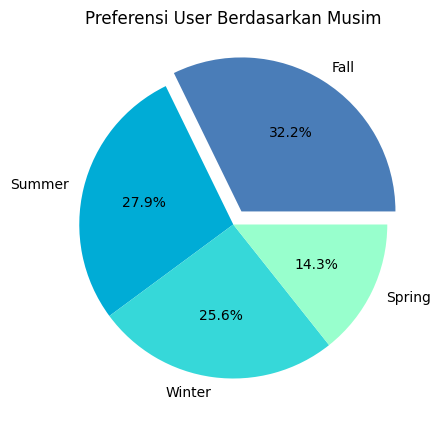

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Preferensi User Berdasarkan Musim")
season_expose = [0.1 , 0, 0, 0]
warna = ['#4a7db8', '#00acd6', '#36d8d9', '#98ffcd' ]

plt.pie(
    season['total_count'],
    labels=season['musim'],
    autopct= '%1.1f%%',
    colors = warna,
    explode = season_expose
)

plt.show()

In [ ]:
def cuaca(x):
  if x == 1:
    return 'Clear'
  elif x == 2:
    return 'Cloudy'
  elif x == 3:
    return 'Light Snow'
  else:
    return 'Heavy Rain'

hour_df['cuaca'] = hour_df['weathersit'].apply(cuaca)

In [ ]:
weather = hour_df[['cuaca', 'total_count']].groupby('cuaca').sum().sort_values(by='total_count', ascending=False).reset_index()

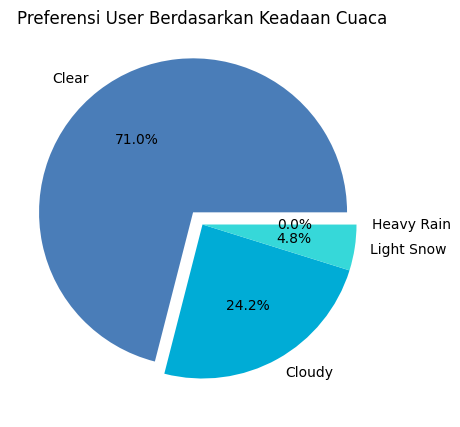

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Preferensi User Berdasarkan Keadaan Cuaca")
season_expose = [0.1, 0, 0, 0]
warna = ['#4a7db8', '#00acd6', '#36d8d9', '#98ffcd' ]

plt.pie(
    weather['total_count'],
    labels=weather['cuaca'],
    autopct= '%1.1f%%',
    colors = warna,
    explode = season_expose
)

plt.show()

- Penggunaan terhadap sistem bike-sharing memiliki persentase tertinggi pada musim gugur (fall) dengan persentase sebesar 32,2% dan musim panas (summer) dengan persentase sebesar 27,9% yang menunjukkan bahwa user lebih suka menggunakan sepeda saat cuaca cenderung hangat dan sejuk.
- Hal ini didukung bahwa sebesar 71% user menggunakan sistem bike-sharing ini ketika suasana cuaca sedang cerah atau sejuk berawan.

### Kapan waktu/jam peminjaman sepeda mencapai angka tertinggi?

In [ ]:
hour_df['musim'] = hour_df['season'].apply(musim)

In [ ]:
user_hour = hour_df[['season', 'hour', 'total_count']]
user_hour = user_hour[['hour', 'season', 'total_count']].groupby('hour').sum().reset_index()

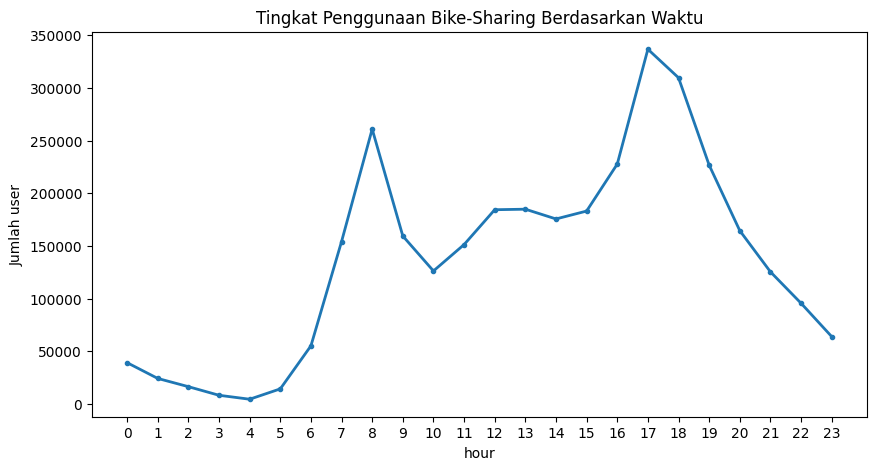

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.plot(
    user_hour['hour'],
    user_hour['total_count'],
    marker=".",
    linewidth=2,
)

plt.ylabel('Jumlah user')
plt.xlabel('hour')
plt.title('Tingkat Penggunaan Bike-Sharing Berdasarkan Waktu')
plt.xticks(ticks=range(0, 24), labels=range(0,24))

plt.show()

In [ ]:
regis_hour = hour_df[['season', 'registered', 'hour']]

regis_spring = regis_hour.loc[regis_hour['season'] == 1]
regis_spring = regis_spring[['hour', 'registered']].groupby('hour').sum().reset_index()

regis_summer = regis_hour.loc[regis_hour['season'] == 2]
regis_summer = regis_summer[['hour', 'registered']].groupby('hour').sum().reset_index()

regis_fall = regis_hour.loc[regis_hour['season'] == 3]
regis_fall = regis_fall[['hour', 'registered']].groupby('hour').sum().reset_index()

regis_winter = regis_hour.loc[regis_hour['season'] == 4]
regis_winter = regis_winter[['hour', 'registered']].groupby('hour').sum().reset_index()

In [ ]:
casual_hour = hour_df[['season', 'casual', 'hour']]

casual_spring = casual_hour.loc[casual_hour['season'] == 1]
casual_spring = casual_spring[['hour', 'casual']].groupby('hour').sum().reset_index()

casual_summer = casual_hour.loc[casual_hour['season'] == 2]
casual_summer = casual_summer[['hour', 'casual']].groupby('hour').sum().reset_index()

casual_fall = casual_hour.loc[casual_hour['season'] == 3]
casual_fall = casual_fall[['hour', 'casual']].groupby('hour').sum().reset_index()

casual_winter = casual_hour.loc[casual_hour['season'] == 4]
casual_winter = casual_winter[['hour', 'casual']].groupby('hour').sum().reset_index()

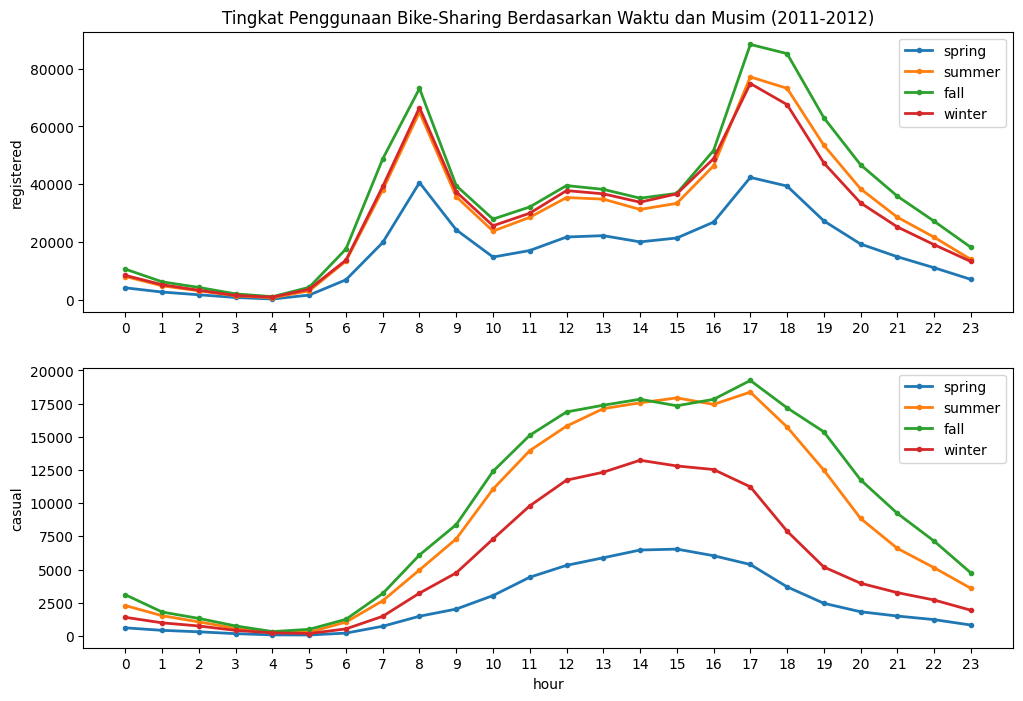

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))

ax[0].plot(
    regis_spring['hour'],
    regis_spring['registered'],
    label='spring',
    marker=".",
    linewidth=2,
)

ax[0].plot(
    regis_summer['hour'],
    regis_summer['registered'],
    label='summer',
    marker=".",
    linewidth=2,
)

ax[0].plot(
    regis_fall['hour'],
    regis_fall['registered'],
    label='fall',
    marker=".",
    linewidth=2,
)

ax[0].plot(
    regis_winter['hour'],
    regis_winter['registered'],
    label='winter',
    marker=".",
    linewidth=2,
)

ax[1].plot(
    casual_spring['hour'],
    casual_spring['casual'],
    label='spring',
    marker=".",
    linewidth=2,
)

ax[1].plot(
    casual_summer['hour'],
    casual_summer['casual'],
    label='summer',
    marker=".",
    linewidth=2,
)

ax[1].plot(
    casual_fall['hour'],
    casual_fall['casual'],
    label='fall',
    marker=".",
    linewidth=2,
)

ax[1].plot(
    casual_winter['hour'],
    casual_winter['casual'],
    label='winter',
    marker=".",
    linewidth=2,
)

ax[0].set_ylabel('registered')
ax[1].set_ylabel('casual')
ax[1].set_xlabel('hour')
ax[0].set_title('Tingkat Penggunaan Bike-Sharing Berdasarkan Waktu dan Musim (2011-2012)')
ax[0].set_xticks(ticks=range(0, 24), labels=range(0,24))
ax[1].set_xticks(ticks=range(0, 24), labels=range(0,24))

ax[0].legend()
ax[1].legend()
plt.show()

- Berdasarkan waktu penggunaannya, banyak dari registered user menggunakan sistem ini diwaktu-waktu berangkat dan pulang kerja yaitu pada pukul 6-8 pagi dan 4-6 sore.
- Berbeda dengan registered user, jumlah casual user justru mulai mengalami peningkatan pada saat-saat jam kerja mulai pukul 9 pagi hingga 5 sore.

## Conclusion

- **Performa setiap tahun**: Bagaimana performa penggunaan bike-sharing dari tahun ke tahun?
  - Peminat terhadap bike-sharing meningkat seiring berjalannya waktu.
  - Peningkatan yang tajam terhadap penggunaan bike-sharing dapat dipengaruhi oleh beberapa faktor diantaranya adanya festival dan event tahunan.
- **Pengaruh hari**: Kapan hari yang memiliki tingkat pengguna/user paling tinggi? Apakah ada hubungannya dengan hari libur?
  - Total penggunaan bike-sharing setiap harinya menunjukkan jumlah yang tinggi dan cenderung konstan.
  - Peningkatan jumlah casual user mulai meningkat di akhir pekan.
  - Sedangkan pada registered user peningkatan jumlah pengguna terjadi di hari kerja.
- **Pengaruh musim**: Kapan musim dengan persentase user tertinggi?
  - Musim gugur dan musim panas memiliki persentase jumlah user tertinggi sepanjang tahun.
  - Sebagian besar user lebih memilih menggunakan bike-sharing saat cuaca sedang cerah atau sejuk berawan.
- **Pengaruh waktu/jam**: Kapan waktu/jam peminjaman sepeda ketika mencapai angka tertinggi?
  - Peningkatan jumlah registered user terjadi di jam berangkat dan pulang kerja.
  - Sedangkan peningkatan jumlah casual user terjadi saat jam kerja di siang hingga sore hari.

In [ ]:
#pip freeze > requirements.txt

In [ ]:
#hour_df.to_csv("all_data.csv", index=False)